# Exploração Inicial e Processamento dos dados 



# Importação das bibliotecas


In [68]:
import numpy as np              # Numerical computing
import pandas as pd             # DataFrames and data analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re # Regular expressions for string manipulation
# Data visualization
import matplotlib.pyplot as plt # Basic plotting
import seaborn as sns           # Statistical plots

# Carregamento dos dados


In [2]:
df = pd.read_csv(r'..\data\raw\credit_score_data.csv')
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_8928\359614134.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'..\data\raw\credit_score_data.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Análise inicial do dados
Tamanho do data set, informações, nulos e duplicados 


In [3]:
df.shape


(100000, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [7]:
df.isnull().sum()  

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [8]:
df.duplicated().sum()  

np.int64(0)

# Pré Processamento 


## Criação de cópia do DataFrame original

In [9]:
# Criando uma cópia do DataFrame original para preservar os dados brutos
df_processado = df.copy()


## Renomeando as colunas para o português
Este passo ajusta os nomes das colunas do DataFrame df_processado para facilitar a leitura e interpretação em português. A renomeação segue uma padronização em snake_case, mantendo a clareza dos significados de cada campo.




In [10]:
df_processado.rename(columns={
    'ID': 'id',
    'Customer_ID': 'id_cliente',
    'Month': 'mes',
    'Name': 'nome',
    'Age': 'idade',
    'SSN': 'ssn',
    'Occupation': 'ocupacao',
    'Annual_Income': 'renda_anual',
    'Monthly_Inhand_Salary': 'salario_liquido_mensal',
    'Num_Bank_Accounts': 'qtd_contas_bancarias',
    'Num_Credit_Card': 'qtd_cartoes_credito',
    'Interest_Rate': 'taxa_juros',
    'Num_of_Loan': 'qtd_emprestimos',
    'Type_of_Loan': 'tipos_emprestimos',
    'Delay_from_due_date': 'dias_atraso_pagamento',
    'Num_of_Delayed_Payment': 'qtd_pagamentos_atrasados',
    'Changed_Credit_Limit': 'variacao_limite_credito',
    'Num_Credit_Inquiries': 'qtd_consultas_credito',
    'Credit_Mix': 'mix_credito',
    'Outstanding_Debt': 'divida_pendente',
    'Credit_Utilization_Ratio': 'percentual_utilizacao_credito',
    'Credit_History_Age': 'tempo_historico_credito',
    'Payment_of_Min_Amount': 'pagamento_valor_minimo',
    'Total_EMI_per_month': 'total_emprestimos_mensal',
    'Amount_invested_monthly': 'valor_investido_mensal',
    'Payment_Behaviour': 'comportamento_pagamento',
    'Monthly_Balance': 'saldo_mensal',
    'Credit_Score': 'score_credito'
}, inplace=True)


In [11]:
df_processado.columns

Index(['id', 'id_cliente', 'mes', 'nome', 'idade', 'ssn', 'ocupacao',
       'renda_anual', 'salario_liquido_mensal', 'qtd_contas_bancarias',
       'qtd_cartoes_credito', 'taxa_juros', 'qtd_emprestimos',
       'tipos_emprestimos', 'dias_atraso_pagamento',
       'qtd_pagamentos_atrasados', 'variacao_limite_credito',
       'qtd_consultas_credito', 'mix_credito', 'divida_pendente',
       'percentual_utilizacao_credito', 'tempo_historico_credito',
       'pagamento_valor_minimo', 'total_emprestimos_mensal',
       'valor_investido_mensal', 'comportamento_pagamento', 'saldo_mensal',
       'score_credito'],
      dtype='object')

Dicionário de dados – Colunas do DataFrame df_processado
| Coluna                          | Descrição                                                                                 |
| ------------------------------- | ----------------------------------------------------------------------------------------- |
| `id`                            | Identificador único da linha no dataset.                                                  |
| `id_cliente`                    | Identificador único de cada cliente (pode se repetir ao longo dos meses).                 |
| `mes`                           | Mês de referência do registro (ex.: Janeiro, Fevereiro).                                  |
| `nome`                          | Nome do cliente (pode ser considerado irrelevante para análise preditiva).                |
| `idade`                         | Idade do cliente. Pode conter valores inválidos (ex.: negativos ou acima de 1000).        |
| `ssn`                           | Número de seguro social mascarado (pode conter dados corrompidos).                        |
| `ocupacao`                      | Profissão ou ocupação atual do cliente.                                                   |
| `renda_anual`                   | Renda anual bruta declarada pelo cliente.                                                 |
| `salario_liquido_mensal`        | Salário líquido recebido mensalmente (renda disponível).                                  |
| `qtd_contas_bancarias`          | Quantidade de contas bancárias que o cliente possui.                                      |
| `qtd_cartoes_credito`           | Número de cartões de crédito ativos do cliente.                                           |
| `taxa_juros`                    | Taxa de juros média aplicada aos cartões de crédito do cliente.                           |
| `qtd_emprestimos`               | Quantidade de empréstimos que o cliente possui.                                           |
| `tipos_emprestimos`             | Lista dos tipos de empréstimos contratados (ex.: Pessoal, Automóvel, Estudantil).         |
| `dias_atraso_pagamento`         | Tempo médio (em dias) de atraso nos pagamentos do cliente.                                |
| `qtd_pagamentos_atrasados`      | Número total de pagamentos feitos com atraso.                                             |
| `variacao_limite_credito`       | Variação percentual no limite do cartão de crédito ao longo do tempo.                     |
| `qtd_consultas_credito`         | Número de consultas ao histórico de crédito do cliente.                                   |
| `mix_credito`                   | Composição do portfólio de crédito do cliente (ex.: bom, padrão, ruim).                   |
| `divida_pendente`               | Valor total de dívida ainda não paga pelo cliente.                                        |
| `percentual_utilizacao_credito` | Percentual do crédito disponível que está sendo utilizado.                                |
| `tempo_historico_credito`       | Tempo de histórico de crédito em formato textual (ex.: "15 Years and 3 Months").          |
| `pagamento_valor_minimo`        | Indica se o cliente costuma pagar apenas o valor mínimo das faturas (Yes/No).             |
| `total_emprestimos_mensal`      | Soma das parcelas mensais pagas por empréstimos ativos (EMI).                             |
| `valor_investido_mensal`        | Valor mensal que o cliente declara investir.                                              |
| `comportamento_pagamento`       | Padrão de comportamento de pagamentos do cliente (ex.: pagamentos pequenos e frequentes). |
| `saldo_mensal`                  | Saldo médio mensal restante após gastos e pagamentos.                                     |
| `score_credito`                 | Score de crédito do cliente classificado em categorias: Poor, Standard ou Good.           |


## Exclusão de colunas identificadoras irrelevantes para modelagem
Nesta etapa, removemos do DataFrame as colunas que contêm dados sensíveis ou que funcionam apenas como identificadores, não contribuindo para a previsão do score de crédito. São elas: id, id_cliente, nome e ssn.

In [12]:
df_processado.drop(columns=['id', 'id_cliente', 'nome', 'ssn'], inplace=True)

In [13]:
df_processado.columns

Index(['mes', 'idade', 'ocupacao', 'renda_anual', 'salario_liquido_mensal',
       'qtd_contas_bancarias', 'qtd_cartoes_credito', 'taxa_juros',
       'qtd_emprestimos', 'tipos_emprestimos', 'dias_atraso_pagamento',
       'qtd_pagamentos_atrasados', 'variacao_limite_credito',
       'qtd_consultas_credito', 'mix_credito', 'divida_pendente',
       'percentual_utilizacao_credito', 'tempo_historico_credito',
       'pagamento_valor_minimo', 'total_emprestimos_mensal',
       'valor_investido_mensal', 'comportamento_pagamento', 'saldo_mensal',
       'score_credito'],
      dtype='object')

# Tratando valores nulos

Nesta etapa, analisamos a quantidade de valores nulos por coluna no DataFrame df_processado, exibindo apenas aquelas que possuem pelo menos um valor ausente. Isso nos ajuda a planejar o tratamento adequado para cada caso.

In [14]:
# Exibindo colunas com pelo menos um valor nulo
df_processado.isnull().sum()[df_processado.isnull().sum() > 0]


salario_liquido_mensal      15002
tipos_emprestimos           11408
qtd_pagamentos_atrasados     7002
qtd_consultas_credito        1965
tempo_historico_credito      9030
valor_investido_mensal       4479
saldo_mensal                 1200
dtype: int64

In [15]:
# Exibindo apenas colunas com valores nulos e suas respectivas porcentagens
(df_processado.isnull().sum() / len(df_processado) * 100).loc[lambda x: x > 0].sort_values(ascending=False)



salario_liquido_mensal      15.002
tipos_emprestimos           11.408
tempo_historico_credito      9.030
qtd_pagamentos_atrasados     7.002
valor_investido_mensal       4.479
qtd_consultas_credito        1.965
saldo_mensal                 1.200
dtype: float64

**Conclusão inicial:**  
As colunas `salario_liquido_mensal`, `tipos_emprestimos`, `tempo_historico_credito`, `qtd_pagamentos_atrasados`, `valor_investido_mensal`, `qtd_consultas_credito` e `saldo_mensal` apresentam valores ausentes acima de 1%, sendo recomendável analisá-las individualmente para definição da melhor estratégia de imputação ou tratamento.


## Salário líquido mensal (renda anual, idade, quantidade de cartões de crédito, total de empréstimos mensal, variação do limite de crédito, dívida pendente)

In [16]:
df_processado.salario_liquido_mensal.unique()

array([1824.84333333,           nan, 3037.98666667, ..., 3097.00833333,
       1929.90666667, 3359.41583333], shape=(13236,))

Antes de definir a melhor estratégia de imputação, visualizamos a distribuição da variável salario_liquido_mensal com um boxplot. Isso nos ajuda a entender presença de assimetria, outliers e dispersão.

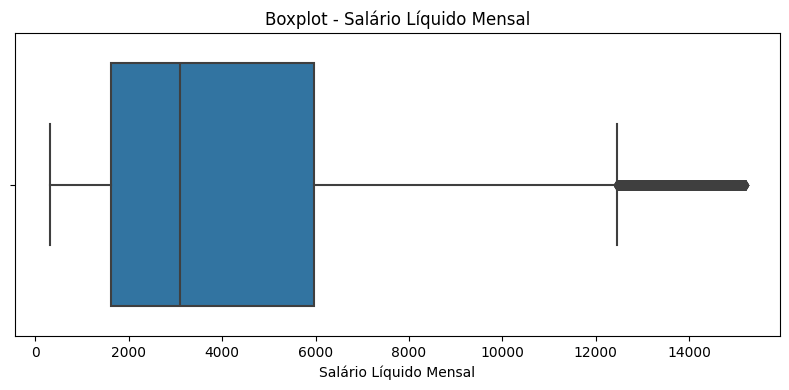

In [17]:
# Boxplot para analisar a distribuição do salário líquido mensal
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_processado['salario_liquido_mensal'])
plt.title('Boxplot - Salário Líquido Mensal')
plt.xlabel('Salário Líquido Mensal')
plt.tight_layout()
plt.show()


**Estratégia de imputação com KMeans baseada em perfis financeiros**
Vamos utilizar o algoritmo KMeans para agrupar clientes com perfis semelhantes, e imputar os valores ausentes da coluna salario_liquido_mensal com base na média dos clusters. Para isso, selecionamos variáveis possivelmente relacionadas ao salário líquido :

renda_anual

idade

qtd_cartoes_credito

total_emprestimos_mensal

variacao_limite_credito

divida_pendente

Antes de aplicar o KMeans, é fundamental garantir que os dados estejam limpos, consistentes e sem distorções que prejudiquem o algoritmo. Isso significa verificar se todas as variáveis numéricas estão corretamente tipadas, padronizar formatos e tratar outliers que possam influenciar a formação dos clusters. Valores extremos podem deslocar os centróides e comprometer tanto o agrupamento quanto a imputação dos salários líquidos.

Como essas mesmas variáveis também serão utilizadas no modelo final de previsão do score de crédito, já vamos adiantar esse processo de tratamento, garantindo que a base esteja organizada, sem inconsistências e pronta para servir tanto ao KMeans quanto às próximas etapas do pipeline de modelagem.


In [18]:
# Selecionando colunas para formar os perfis de clientes
variaveis_cluster = [
    'renda_anual',
    'idade',
    'qtd_cartoes_credito',
    'total_emprestimos_mensal',
    'variacao_limite_credito',
    'divida_pendente'
]

In [19]:
df_processado[variaveis_cluster].head()


,renda_anual,idade,qtd_cartoes_credito,total_emprestimos_mensal,variacao_limite_credito,divida_pendente
0,19114.12,23,4,49.574949,11.27,809.98
1,19114.12,23,4,49.574949,11.27,809.98
2,19114.12,-500,4,49.574949,_,809.98
3,19114.12,23,4,49.574949,6.27,809.98
4,19114.12,23,4,49.574949,11.27,809.98


In [20]:
df_processado[variaveis_cluster].dtypes

renda_anual                  object
idade                        object
qtd_cartoes_credito           int64
total_emprestimos_mensal    float64
variacao_limite_credito      object
divida_pendente              object
dtype: object

In [21]:
# Exibindo valores únicos não numéricos para cada coluna do tipo object usada no KMeans
for col in ['renda_anual', 'idade', 'variacao_limite_credito', 'divida_pendente']:
    print(f"\n--- Valores inválidos detectados em: {col} ---")
    print(df_processado[col].unique()[:30])  # Mostra apenas os 30 primeiros valores únicos



--- Valores inválidos detectados em: renda_anual ---
['19114.12' '34847.84' '34847.84_' '143162.64' '30689.89' '30689.89_'
 '35547.71_' '35547.71' '73928.46' '131313.4' '10909427.0' '34081.38_'
 '34081.38' '114838.41' '114838.41_' '31370.8' '33751.27' '88640.24'
 '88640.24_' '54392.16' '54392.16_' '8701.545' '8701.545_' '25546.26'
 '25546.26_' '31993.78' '92047.08' '92047.08_' '32284.62' '97791.42']

--- Valores inválidos detectados em: idade ---
['23' '-500' '28_' '28' '34' '54' '55' '21' '31' '33' '34_' '7580' '30'
 '30_' '24' '24_' '44' '45' '40' '41' '32' '33_' '35' '35_' '36' '39' '37'
 '181' '20' '46']

--- Valores inválidos detectados em: variacao_limite_credito ---
['11.27' '_' '6.27' '9.27' '5.42' '7.42' '6.42' '7.1' '11.1' '9.1' '1.99'
 '-2.01' '-1.01' '-3.01' '2.58' '10.14' '9.14' '9.34' '15.34' '8.34'
 '11.34' '17.13' '21.13' '18.13' '8.24' '11.24' '5.76'
 '-1.2400000000000002' '1.7599999999999998' '11.0']

--- Valores inválidos detectados em: divida_pendente ---
['809.98'

### Renda Anual

Limpando e convertendo a coluna renda_anual para tipo numérico

In [22]:
# Passo 1: Remover underscores
df_processado['renda_anual'] = df_processado['renda_anual'].str.replace('_', '', regex=False)

# Passo 2: Conferir se restaram caracteres não numéricos
invalidos_renda_anual = df_processado[
    ~df_processado['renda_anual'].str.replace('.', '', regex=False).str.isnumeric()
]['renda_anual'].unique()

print("Valores ainda inválidos em renda_anual:", invalidos_renda_anual)

# Passo 3: Se não houver valores inválidos, converter para float
if len(invalidos_renda_anual) == 0:
    df_processado['renda_anual'] = df_processado['renda_anual'].astype(float)

# Passo 4: Conferir tipo final
print("Tipo final de renda_anual:", df_processado['renda_anual'].dtype)


Valores ainda inválidos em renda_anual: []
Tipo final de renda_anual: float64


Visualizamos a distribuição da variável renda_anual para identificar a presença de outliers e avaliar sua magnitude.

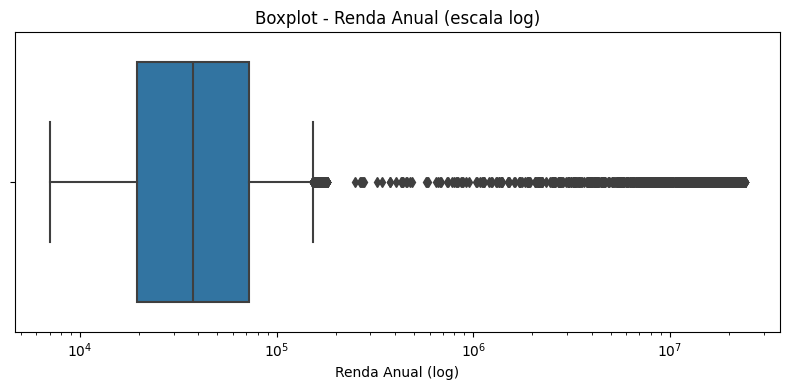

In [23]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_processado['renda_anual'])
plt.xscale('log')  # aplica escala logarítmica no eixo X
plt.title('Boxplot - Renda Anual (escala log)')
plt.xlabel('Renda Anual (log)')
plt.tight_layout()
plt.show()


In [24]:
# Exibindo estatísticas descritivas de renda_anual sem notação científica
pd.set_option('display.float_format', '{:,.2f}'.format)
df_processado['renda_anual'].describe()


count      100,000.00
mean       176,415.70
std      1,429,618.05
min          7,005.93
25%         19,457.50
50%         37,578.61
75%         72,790.92
max     24,198,062.00
Name: renda_anual, dtype: float64

Conclusão sobre a variável renda_anual:
Apesar de apresentar uma quantidade significativa de valores que podem ser considerados outliers pelo critério estatístico, esses valores refletem a realidade de rendas muito variadas dentro do conjunto de clientes. Não foram identificados registros absurdos ou inconsistentes, apenas clientes com rendas extremamente altas em relação à média. Portanto, não será realizada a remoção nem o ajuste desses valores.

### Idade


Limpando e convertendo a coluna idade para tipo numérico

In [25]:
# Passo 1: Remover underscores
df_processado['idade'] = df_processado['idade'].str.replace('_', '', regex=False)

# Passo 2: Conferir se ainda há valores não numéricos
invalidos_idade = df_processado[
    ~df_processado['idade'].str.replace('-', '', regex=False).str.isnumeric()
]['idade'].unique()

print("Valores ainda inválidos em idade:", invalidos_idade)

# Passo 3: Converter para inteiro se não houver valores inválidos
if len(invalidos_idade) == 0:
    df_processado['idade'] = df_processado['idade'].astype(int)

# Passo 4: Conferir tipo final
print("Tipo final de idade:", df_processado['idade'].dtype)


Valores ainda inválidos em idade: []
Tipo final de idade: int64


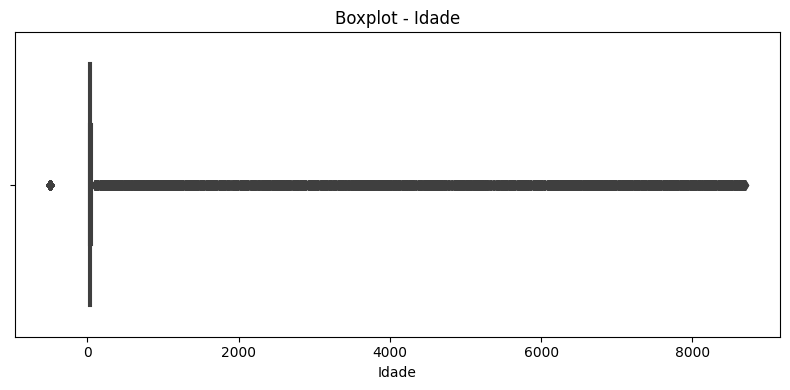

In [26]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_processado['idade'])
plt.title('Boxplot - Idade')
plt.xlabel('Idade')
plt.tight_layout()
plt.show()

In [27]:
pd.set_option('display.float_format', '{:,.0f}'.format)
print(df_processado['idade'].describe())


count   100,000
mean        111
std         686
min        -500
25%          24
50%          33
75%          42
max       8,698
Name: idade, dtype: float64


In [28]:
total_linhas = len(df_processado)

abaixo_18 = (df_processado['idade'] < 18).sum()
acima_100 = (df_processado['idade'] > 100).sum()

print(f"Percentual abaixo de 18 anos: {(abaixo_18 / total_linhas) * 100:.2f}%")
print(f"Percentual acima de 100 anos: {(acima_100 / total_linhas) * 100:.2f}%")


Percentual abaixo de 18 anos: 6.59%
Percentual acima de 100 anos: 1.89%


Idades abaixo de 18 e acima de 100 são tratadas como inválidas. Vamos substituí-las por NaN para que sejam imputadas posteriormente pelo modelo de KMeans.

In [29]:
# Substituindo idades inválidas (<18 e >100) por NaN
df_processado.loc[(df_processado['idade'] < 18) | (df_processado['idade'] > 100), 'idade'] = np.nan

# Conferindo resultado
print(df_processado['idade'].isna().sum(), "valores nulos em idade após substituição.")

8482 valores nulos em idade após substituição.


### Variação limite de crédito

Limpando e convertendo variacao_limite_credito para float usando 99999 como placeholder

In [30]:
# Passo 1: Remover underscores e substituir por placeholder 99999
df_processado['variacao_limite_credito'] = df_processado['variacao_limite_credito'].str.replace('_', '99999', regex=False)

# Passo 2: Verificar se restam valores inválidos
invalidos_limite = df_processado[
    ~df_processado['variacao_limite_credito'].str.replace('-', '', regex=False).str.replace('.', '', regex=False).str.isnumeric()
]['variacao_limite_credito'].unique()

print("Valores ainda inválidos em variacao_limite_credito:", invalidos_limite)

# Passo 3: Converter para float somente se não restarem inválidos
if len(invalidos_limite) == 0:
    df_processado['variacao_limite_credito'] = df_processado['variacao_limite_credito'].astype(float)
    
    # Passo 4: Arredondar para 2 casas decimais
    df_processado['variacao_limite_credito'] = df_processado['variacao_limite_credito'].round(2)

# Conferindo tipo final
print("Tipo final:", df_processado['variacao_limite_credito'].dtype)


Valores ainda inválidos em variacao_limite_credito: []
Tipo final: float64


In [31]:
total = len(df_processado)
placeholder_99999 = (df_processado['variacao_limite_credito'] == 99999).sum()

porcentagem = (placeholder_99999 / total) * 100

print(f"Total de registros com 99999: {placeholder_99999}")
print(f"Percentual em relação ao total: {porcentagem:.2f}%")

Total de registros com 99999: 2091
Percentual em relação ao total: 2.09%


Boxplot para variacao_limite_credito (removendo o placeholder 99999)

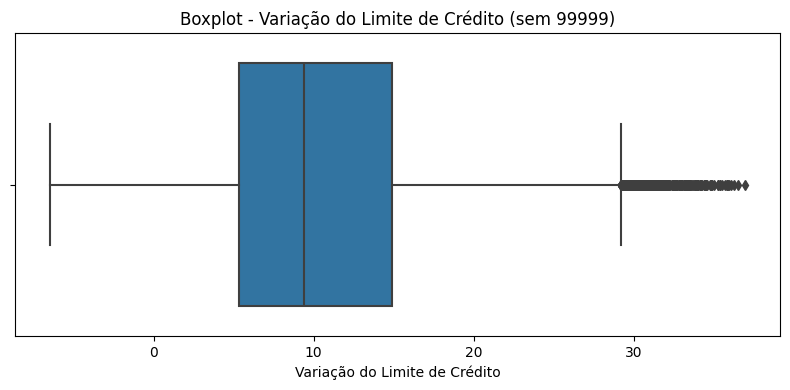

In [32]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_processado[df_processado['variacao_limite_credito'] != 99999]['variacao_limite_credito'])
plt.title('Boxplot - Variação do Limite de Crédito (sem 99999)')
plt.xlabel('Variação do Limite de Crédito')
plt.tight_layout()
plt.show()


Apenas 2,09% dos registros tinham underscore e foram tratados com o placeholder 99999. Após analisar o boxplot (sem esses placeholders), observou-se que não há grande concentração de outliers extremos — os valores variam de forma plausível para uma variável de limite de crédito.

Portanto, a melhor abordagem será imputar os valores de 99999 pela mediana da variável, garantindo que a distribuição original não seja distorcida e evitando a influência de possíveis valores extremos.

In [33]:
# Calculando a mediana sem considerar o placeholder 99999
mediana_limite = df_processado.loc[df_processado['variacao_limite_credito'] != 99999, 'variacao_limite_credito'].median()

# Substituindo 99999 pela mediana
df_processado.loc[df_processado['variacao_limite_credito'] == 99999, 'variacao_limite_credito'] = mediana_limite

# Conferindo se ainda existem placeholders
placeholders_restantes = (df_processado['variacao_limite_credito'] == 99999).sum()
print(f"Placeholders restantes: {placeholders_restantes}")
print(f"Mediana usada na imputação: {mediana_limite}")
df_processado['variacao_limite_credito'].describe()

Placeholders restantes: 0
Mediana usada na imputação: 9.4


count   100,000
mean         10
std           7
min          -6
25%           5
50%           9
75%          15
max          37
Name: variacao_limite_credito, dtype: float64

### Divida pendente

Limpando e convertendo a coluna divida_pendente para tipo numérico


In [34]:
# Passo 1: Remover underscores
df_processado['divida_pendente'] = df_processado['divida_pendente'].str.replace('_', '', regex=False)

# Passo 2: Conferir se restaram valores inválidos
invalidos_divida = df_processado[
    ~df_processado['divida_pendente'].str.replace('-', '', regex=False).str.replace('.', '', regex=False).str.isnumeric()
]['divida_pendente'].unique()

print("Valores ainda inválidos em divida_pendente:", invalidos_divida)

# Passo 3: Converter para float somente se não restarem inválidos
if len(invalidos_divida) == 0:
    df_processado['divida_pendente'] = df_processado['divida_pendente'].astype(float)
    df_processado['divida_pendente'] = df_processado['divida_pendente'].round(2)

# Conferindo tipo final
print("Tipo final de divida_pendente:", df_processado['divida_pendente'].dtype)


Valores ainda inválidos em divida_pendente: []
Tipo final de divida_pendente: float64


Estatísticas descritivas e boxplot para divida_pendente

count   100,000.00
mean      1,426.22
std       1,155.13
min           0.23
25%         566.07
50%       1,166.15
75%       1,945.96
max       4,998.07
Name: divida_pendente, dtype: float64


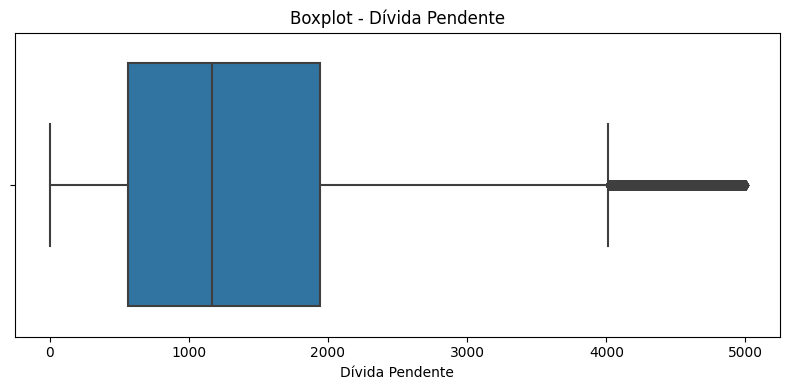

In [35]:
# Estatísticas descritivas
pd.set_option('display.float_format', '{:,.2f}'.format)
print(df_processado['divida_pendente'].describe())

# Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.boxplot(x=df_processado['divida_pendente'])
plt.title('Boxplot - Dívida Pendente')
plt.xlabel('Dívida Pendente')
plt.tight_layout()
plt.show()


Os valores mínimos e máximos encontrados são aceitáveis para o contexto financeiro, mesmo com a presença de outliers identificados no boxplot. A faixa de variação ( 0,23 a 4.998,07) é coerente com diferentes perfis de clientes e seus níveis de endividamento. Assim, não haverá remoção ou ajuste desses valores, mantendo a integridade da distribuição original.



### Quantidade de Cartões e Total de emrestimso mensal 

       qtd_cartoes_credito  total_emprestimos_mensal
count           100,000.00                100,000.00
mean                 22.47                  1,403.12
std                 129.06                  8,306.04
min                   0.00                      0.00
25%                   4.00                     30.31
50%                   5.00                     69.25
75%                   7.00                    161.22
max               1,499.00                 82,331.00


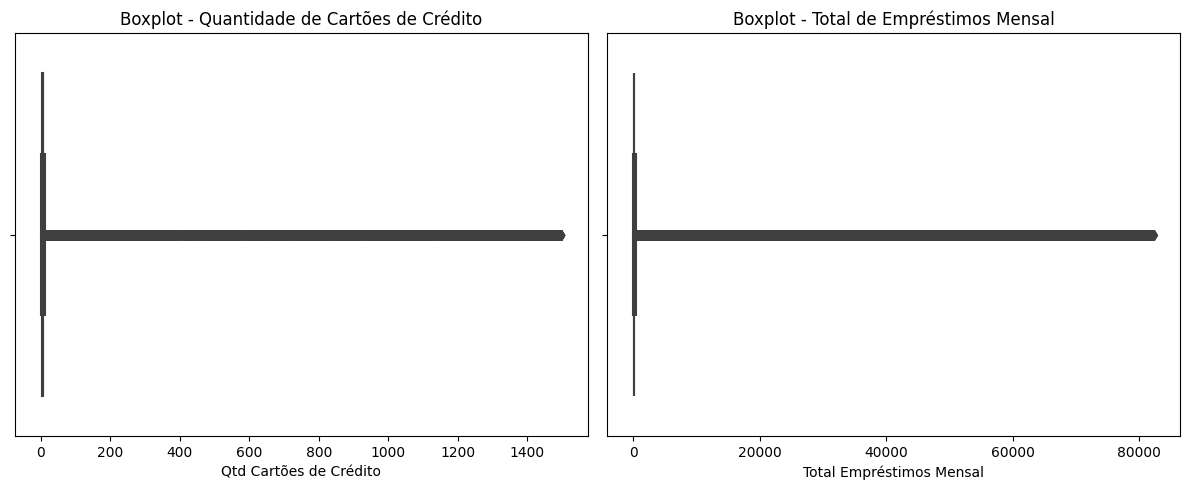

In [36]:
# Estatísticas descritivas
pd.set_option('display.float_format', '{:,.2f}'.format)
print(df_processado[['qtd_cartoes_credito', 'total_emprestimos_mensal']].describe())


plt.figure(figsize=(12,5))

# Boxplot para qtd_cartoes_credito
plt.subplot(1, 2, 1)
sns.boxplot(x=df_processado['qtd_cartoes_credito'])
plt.title('Boxplot - Quantidade de Cartões de Crédito')
plt.xlabel('Qtd Cartões de Crédito')

# Boxplot para total_emprestimos_mensal
plt.subplot(1, 2, 2)
sns.boxplot(x=df_processado['total_emprestimos_mensal'])
plt.title('Boxplot - Total de Empréstimos Mensal')
plt.xlabel('Total Empréstimos Mensal')

plt.tight_layout()
plt.show()


Estratégia de tratamento para qtd_cartoes_credito e total_emprestimos_mensal
A análise descritiva mostrou comportamentos distintos entre as duas variáveis:

qtd_cartoes_credito:
A mediana é de 5 cartões, mas há registros com valores extremamente altos (até 1.499 cartões), o que é irrealista. Para preservar a integridade da base, adotaremos um limite superior (cap) de 20 cartões. Todos os registros acima desse valor serão imputados com a mediana (5), garantindo consistência sem distorcer a distribuição.

total_emprestimos_mensal:
Apesar de apresentar valores elevados (máximo de R$ 82.331,00), esses números são financeiramente plausíveis, já que clientes com alto volume de crédito podem ter parcelas altas. Portanto, não faremos ajustes nem imputações nessa variável.

In [37]:
# Calculando a mediana de qtd_cartoes_credito
mediana_cartoes = df_processado['qtd_cartoes_credito'].median()

# Aplicando o limite superior (cap) de 20 cartões
df_processado.loc[df_processado['qtd_cartoes_credito'] > 20, 'qtd_cartoes_credito'] = mediana_cartoes

# Conferindo se ainda existem valores acima de 20
print("Valores acima de 20 após imputação:", (df_processado['qtd_cartoes_credito'] > 20).sum())
print(f"Mediana usada na imputação: {mediana_cartoes}")


Valores acima de 20 após imputação: 0
Mediana usada na imputação: 5.0


### KMeans para imputar Idade e Salário Liquido Mensal


1️⃣ Treinar o KMeans sem usar idade (pois idade ainda tem muito NaN);
2️⃣ Imputar a idade dos clientes com base nos clusters formados;
3️⃣ Atualizar idade no dataset;
4️⃣ Treinar um novo KMeans agora incluindo idade;
5️⃣ Imputar salario_liquido_mensal com base nos clusters refinados.

Criando o DataFrame e padronizando os dados (sem idade)

In [47]:
# Variáveis sem idade
variaveis_sem_idade = [
    'renda_anual',
    'qtd_cartoes_credito',
    'total_emprestimos_mensal',
    'variacao_limite_credito',
    'divida_pendente'
]

# Criar DataFrame somente com essas variáveis
df_kmeans_idade = df_processado[variaveis_sem_idade + ['idade']].copy()

# Padronizar dados
scaler_idade = StandardScaler()
X_idade_scaled = scaler_idade.fit_transform(df_kmeans_idade[variaveis_sem_idade])

Determinando o número ideal de clusters (método do cotovelo – sem idade)

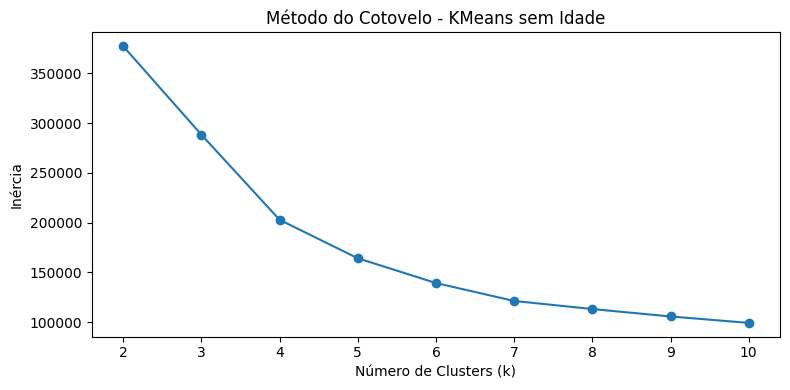

In [49]:
inercias = []
k_values = range(2, 11)  # vamos testar de 2 a 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_idade_scaled)
    inercias.append(kmeans.inertia_)

# Plot do método do cotovelo
plt.figure(figsize=(8, 4))
plt.plot(k_values, inercias, marker='o')
plt.title('Método do Cotovelo - KMeans sem Idade')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.xticks(k_values)
plt.tight_layout()
plt.show()


Treinando o KMeans e atribuindo os clusters (sem idade)

In [50]:
# Treinar KMeans com 5 clusters
kmeans_idade = KMeans(n_clusters=5, random_state=42, n_init=10)

# Ajustar o modelo aos dados padronizados
df_kmeans_idade['cluster_idade'] = kmeans_idade.fit_predict(X_idade_scaled)

# Conferir a distribuição dos clusters
print(df_kmeans_idade['cluster_idade'].value_counts())


cluster_idade
0    45220
1    37205
3    14848
4     2038
2      689
Name: count, dtype: int64


Calculando a mediana de idade por cluster e imputando no DataFrame

In [51]:
# Criar cópia do DataFrame original para imputação
df_processado_kmeans1 = df_processado.copy()

# Calcular a mediana de idade para cada cluster
mediana_idade_cluster = df_kmeans_idade.groupby('cluster_idade')['idade'].median()

# Iterar sobre os clusters e imputar as idades faltantes com a mediana de cada cluster
for cluster in mediana_idade_cluster.index:
    idade_mediana = mediana_idade_cluster.loc[cluster]
    df_processado_kmeans1.loc[
        (df_processado_kmeans1['idade'].isna()) &
        (df_kmeans_idade['cluster_idade'] == cluster),
        'idade'
    ] = idade_mediana

# Conferindo se ainda existem idades nulas após a imputação
print("Idades nulas após imputação:", df_processado_kmeans1['idade'].isna().sum())


Idades nulas após imputação: 0


Criar DataFrame e padronizar (agora incluindo idade)

In [52]:
# Variáveis agora incluem idade
variaveis_com_idade = [
    'renda_anual',
    'idade',
    'qtd_cartoes_credito',
    'total_emprestimos_mensal',
    'variacao_limite_credito',
    'divida_pendente'
]

# Criar DataFrame para o novo KMeans
df_kmeans_salario = df_processado_kmeans1[variaveis_com_idade + ['salario_liquido_mensal']].copy()

# Padronizar dados
scaler_salario = StandardScaler()
X_salario_scaled = scaler_salario.fit_transform(df_kmeans_salario[variaveis_com_idade])

print("Shape dos dados padronizados (com idade):", X_salario_scaled.shape)


Shape dos dados padronizados (com idade): (100000, 6)


Treinando o KMeans com idade incluída (5 clusters)

In [53]:
# Treinar KMeans com 5 clusters usando as variáveis que agora incluem idade
kmeans_salario = KMeans(n_clusters=5, random_state=42, n_init=10)

# Ajustar o modelo e prever os clusters
df_kmeans_salario['cluster_salario'] = kmeans_salario.fit_predict(X_salario_scaled)

# Conferir a distribuição dos clusters
print(df_kmeans_salario['cluster_salario'].value_counts())

cluster_salario
2    43140
0    31360
1    22784
3     2027
4      689
Name: count, dtype: int64


Calculando a mediana do salário por cluster e imputando no DataFrame

In [54]:
# Criar cópia do DataFrame com idade já imputada
df_processado_kmeans2 = df_processado_kmeans1.copy()

# Calcular a mediana de salario_liquido_mensal para cada cluster
mediana_salario_cluster = df_kmeans_salario.groupby('cluster_salario')['salario_liquido_mensal'].median()

# Iterar sobre os clusters e imputar os salários faltantes com a mediana de cada cluster
for cluster in mediana_salario_cluster.index:
    salario_mediana = mediana_salario_cluster.loc[cluster]
    df_processado_kmeans2.loc[
        (df_processado_kmeans2['salario_liquido_mensal'].isna()) &
        (df_kmeans_salario['cluster_salario'] == cluster),
        'salario_liquido_mensal'
    ] = salario_mediana

# Conferindo se ainda existem salários nulos após a imputação
print("Salário líquido mensal nulo após imputação:", df_processado_kmeans2['salario_liquido_mensal'].isna().sum())


Salário líquido mensal nulo após imputação: 0


In [55]:
# Atualizando df_processado com os valores imputados de idade e salario_liquido_mensal
df_processado.update(df_processado_kmeans2[['idade', 'salario_liquido_mensal']])

# Conferindo se restaram valores nulos
print("Idades nulas no df_processado:", df_processado['idade'].isna().sum())
print("Salário líquido mensal nulo no df_processado:", df_processado['salario_liquido_mensal'].isna().sum())


Idades nulas no df_processado: 0
Salário líquido mensal nulo no df_processado: 0


## Tipos de Empréstimos 

In [59]:
print(df_processado['tipos_emprestimos'].unique())

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']


In [61]:
# Contando valores únicos
qtd_unicos = df_processado['tipos_emprestimos'].nunique()

print(f"Quantidade de valores únicos em tipos_emprestimos: {qtd_unicos}")


Quantidade de valores únicos em tipos_emprestimos: 6260


In [62]:
# Listar as 20 combinações mais comuns de tipos de empréstimos
df_processado['tipos_emprestimos'].value_counts().iloc[:20]


tipos_emprestimos
Not Specified                               1408
Credit-Builder Loan                         1280
Personal Loan                               1272
Debt Consolidation Loan                     1264
Student Loan                                1240
Payday Loan                                 1200
Mortgage Loan                               1176
Auto Loan                                   1152
Home Equity Loan                            1136
Personal Loan, and Student Loan              320
Not Specified, and Payday Loan               272
Mortgage Loan, and Home Equity Loan          264
Student Loan, and Payday Loan                256
Credit-Builder Loan, and Not Specified       248
Student Loan, and Credit-Builder Loan        248
Payday Loan, and Debt Consolidation Loan     240
Payday Loan, and Auto Loan                   240
Credit-Builder Loan, and Mortgage Loan       232
Payday Loan, and Personal Loan               232
Personal Loan, and Credit-Builder Loan       232
Na

Plano de tratamento para a coluna:

Se a célula contiver vírgula, indicando mais de um tipo de empréstimo, a classificação será “Two or More Types of Loan”.

Se o valor for nulo (NaN), será preenchido como “Not Specified”.

Se houver apenas um tipo de empréstimo, como por exemplo “Auto Loan”, o nome do empréstimo será mantido exatamente como está.

In [63]:
# Criar uma cópia da coluna para não sobrescrever de imediato
df_processado['tipos_emprestimos_simplificado'] = df_processado['tipos_emprestimos']

# Substituir os nulos por 'Not Specified'
df_processado['tipos_emprestimos_simplificado'] = df_processado['tipos_emprestimos_simplificado'].fillna('Not Specified')

# Se houver vírgula, significa mais de um empréstimo
df_processado.loc[df_processado['tipos_emprestimos_simplificado'].str.contains(','), 'tipos_emprestimos_simplificado'] = 'Two or More Types of Loan'

# Conferir distribuição final
df_processado['tipos_emprestimos_simplificado'].value_counts()


tipos_emprestimos_simplificado
Two or More Types of Loan    77464
Not Specified                12816
Credit-Builder Loan           1280
Personal Loan                 1272
Debt Consolidation Loan       1264
Student Loan                  1240
Payday Loan                   1200
Mortgage Loan                 1176
Auto Loan                     1152
Home Equity Loan              1136
Name: count, dtype: int64

In [64]:
# Removendo a coluna original para manter apenas a versão tratada
df_processado.drop(columns=['tipos_emprestimos'], inplace=True)

# Renomeando a coluna simplificada para voltar ao nome original
df_processado.rename(columns={'tipos_emprestimos_simplificado': 'tipos_emprestimos'}, inplace=True)

## Tempo Histórico Crédito

In [66]:
# Contar quantos valores únicos existem
qtd_unicos_tempo = df_processado['tempo_historico_credito'].nunique()

print(f"Quantidade de valores únicos em tempo_historico_credito: {qtd_unicos_tempo}")

# Exibir os 20 primeiros valores únicos para entender o formato
valores_unicos = df_processado['tempo_historico_credito'].unique()[:20]
print(valores_unicos)


Quantidade de valores únicos em tempo_historico_credito: 404
['22 Years and 1 Months' nan '22 Years and 3 Months'
 '22 Years and 4 Months' '22 Years and 5 Months' '22 Years and 6 Months'
 '22 Years and 7 Months' '26 Years and 7 Months' '26 Years and 8 Months'
 '26 Years and 9 Months' '26 Years and 10 Months' '26 Years and 11 Months'
 '27 Years and 0 Months' '27 Years and 1 Months' '27 Years and 2 Months'
 '17 Years and 9 Months' '17 Years and 10 Months' '17 Years and 11 Months'
 '18 Years and 1 Months' '18 Years and 2 Months']


 Transformar o tempo de histórico de crédito em meses numéricos

In [69]:

# Função para converter o tempo de histórico em meses
def convert_to_months(value):
    if isinstance(value, str):
        match = re.search(r'(\d+)\s+Years?.*?(\d+)\s+Months?', value)
        if match:
            years = int(match.group(1))
            months = int(match.group(2))
            return years * 12 + months
    return np.nan  # retorna NaN para valores inválidos ou ausentes

# Aplicar a função na coluna tempo_historico_credito
df_processado['tempo_historico_credito_meses'] = df_processado['tempo_historico_credito'].apply(convert_to_months)

# Conferir os primeiros valores convertidos
print(df_processado[['tempo_historico_credito', 'tempo_historico_credito_meses']].head(10))


  tempo_historico_credito  tempo_historico_credito_meses
0   22 Years and 1 Months                         265.00
1                     NaN                            NaN
2   22 Years and 3 Months                         267.00
3   22 Years and 4 Months                         268.00
4   22 Years and 5 Months                         269.00
5   22 Years and 6 Months                         270.00
6   22 Years and 7 Months                         271.00
7                     NaN                            NaN
8   26 Years and 7 Months                         319.00
9   26 Years and 8 Months                         320.00


 Imputando valores nulos de tempo_historico_credito_meses com a mediana

In [71]:
# Calcular a mediana
mediana_tempo = df_processado['tempo_historico_credito_meses'].median()

# Substituir os valores nulos pela mediana (sem usar inplace)
df_processado['tempo_historico_credito_meses'] = df_processado['tempo_historico_credito_meses'].fillna(mediana_tempo)

# Conferir se ainda existem valores nulos
print("Valores nulos restantes:", df_processado['tempo_historico_credito_meses'].isna().sum())
print(f"Mediana usada na imputação: {mediana_tempo}")


Valores nulos restantes: 0
Mediana usada na imputação: 219.0


 Remover a original e deixar a versão com “_meses”

In [ ]:
# Remover a coluna original em texto, mantendo apenas a versão em meses
df_processado.drop(columns=['tempo_historico_credito'], inplace=True)




KeyError: "['tempo_historico_credito'] not found in axis"

In [78]:
# Conferindo se a coluna foi removida e a versão em meses está presente
df_processado.tempo_historico_credito_meses.head(3)

0   265.00
1   219.00
2   267.00
Name: tempo_historico_credito_meses, dtype: float64

In [79]:
# Converter a coluna para inteiro
df_processado['tempo_historico_credito_meses'] = df_processado['tempo_historico_credito_meses'].astype(int)

# Conferir o novo tipo
print(df_processado['tempo_historico_credito_meses'].dtype)

int64


## Valor Investido Mensal

In [80]:
# Visualizando os primeiros valores da coluna 'valor_investido_mensal'
df_processado['valor_investido_mensal'].head(10)


0     80.41529543900253
1    118.28022162236736
2       81.699521264648
3     199.4580743910713
4    41.420153086217326
5    62.430172331195294
6     178.3440674122349
7    24.785216509052056
8      104.291825168246
9     40.39123782853101
Name: valor_investido_mensal, dtype: object

In [81]:
# Mostrando os 30 primeiros valores únicos da coluna 'valor_investido_mensal'
df_processado['valor_investido_mensal'].unique()[:30]


array(['80.41529543900253', '118.28022162236736', '81.699521264648',
       '199.4580743910713', '41.420153086217326', '62.430172331195294',
       '178.3440674122349', '24.785216509052056', '104.291825168246',
       '40.39123782853101', '58.51597569589465', '99.30622796053305',
       '130.11542024292334', '43.477190144355745', '70.10177420755677',
       '218.90434353388733', '168.413702679309', '232.86038375993544',
       '__10000__', '825.2162699393922', '430.9475278803298',
       '257.80809942568976', '263.17416316163934', '81.22885871073616',
       '124.88181990234848', '83.40650880252501', '272.3340373956682',
       '84.95284817115969', '71.28367488286933', '125.61725053231268'],
      dtype=object)

Limpando valor_investido_mensal com placeholder 999999 e conversão direta para float

In [82]:
# 1. Remover underscores do início e do fim
df_processado['valor_investido_mensal'] = df_processado['valor_investido_mensal'].str.replace(r'^_+|_+$', '', regex=True)

# 2. Substituir nulos pelo placeholder 999999
df_processado['valor_investido_mensal'] = df_processado['valor_investido_mensal'].fillna('999999')

# 3. Converter para float diretamente
df_processado['valor_investido_mensal'] = df_processado['valor_investido_mensal'].astype(float)

# 4. Conferir se deu certo
df_processado['valor_investido_mensal'].info()
df_processado['valor_investido_mensal'].head(10)


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: valor_investido_mensal
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


0    80.42
1   118.28
2    81.70
3   199.46
4    41.42
5    62.43
6   178.34
7    24.79
8   104.29
9    40.39
Name: valor_investido_mensal, dtype: float64

Estamos utilizando os clusters do KMeans porque eles representam grupos de clientes com perfis financeiros semelhantes, baseados em variáveis como renda, idade, dívidas e limites de crédito. Assim, ao imputar os valores ausentes de valor_investido_mensal pela mediana de cada cluster, garantimos que os valores preenchidos sejam mais coerentes com o perfil de cada cliente do que se usássemos apenas uma mediana global.

In [84]:
# Criar DataFrame de imputação a partir do df_processado
df_para_imputacao_valor_investido_mensal = df_processado.copy()

# Adicionar a coluna de cluster já criada no KMeans com idade
df_para_imputacao_valor_investido_mensal['cluster_salario'] = df_kmeans_salario['cluster_salario']

# Garantir que a coluna valor_investido_mensal esteja presente
print("Colunas disponíveis:", df_para_imputacao_valor_investido_mensal.columns.tolist())
print("Total de valores 999999 em valor_investido_mensal:", (df_para_imputacao_valor_investido_mensal['valor_investido_mensal'] == 999999).sum())


Colunas disponíveis: ['mes', 'idade', 'ocupacao', 'renda_anual', 'salario_liquido_mensal', 'qtd_contas_bancarias', 'qtd_cartoes_credito', 'taxa_juros', 'qtd_emprestimos', 'dias_atraso_pagamento', 'qtd_pagamentos_atrasados', 'variacao_limite_credito', 'qtd_consultas_credito', 'mix_credito', 'divida_pendente', 'percentual_utilizacao_credito', 'pagamento_valor_minimo', 'total_emprestimos_mensal', 'valor_investido_mensal', 'comportamento_pagamento', 'saldo_mensal', 'score_credito', 'tipos_emprestimos', 'tempo_historico_credito_meses', 'cluster_salario']
Total de valores 999999 em valor_investido_mensal: 4479


In [85]:
# Calcular a mediana do valor investido mensal por cluster (ignorando o placeholder 999999)
mediana_investimento_cluster = df_para_imputacao_valor_investido_mensal.loc[
    df_para_imputacao_valor_investido_mensal['valor_investido_mensal'] != 999999
].groupby('cluster_salario')['valor_investido_mensal'].median()

# Criar uma cópia do df_processado para registrar a imputação final
df_processado_kmeans3 = df_processado.copy()

# Substituir 999999 pela mediana do cluster
for cluster in mediana_investimento_cluster.index:
    investimento_mediana = mediana_investimento_cluster.loc[cluster]
    df_processado_kmeans3.loc[
        (df_para_imputacao_valor_investido_mensal['cluster_salario'] == cluster) &
        (df_processado_kmeans3['valor_investido_mensal'] == 999999),
        'valor_investido_mensal'
    ] = investimento_mediana

# Conferir se ainda existe placeholder
placeholders_restantes = (df_processado_kmeans3['valor_investido_mensal'] == 999999).sum()
print(f"Placeholders restantes: {placeholders_restantes}")


Placeholders restantes: 0


Atualizando valor_investido_mensal no DataFrame principal

In [86]:
# Atualizando a coluna valor_investido_mensal no df_processado
df_processado['valor_investido_mensal'] = df_processado_kmeans3['valor_investido_mensal']

# Conferindo se a atualização deu certo
print("Valores nulos após atualização:", df_processado['valor_investido_mensal'].isna().sum())
print("Maior valor da coluna:", df_processado['valor_investido_mensal'].max())
print("Menor valor da coluna:", df_processado['valor_investido_mensal'].min())

# Visualizando as 10 primeiras linhas para validar
df_processado[['valor_investido_mensal']].head(10)


Valores nulos após atualização: 0
Maior valor da coluna: 10000.0
Menor valor da coluna: 0.0


,valor_investido_mensal
0,80.42
1,118.28
2,81.70
3,199.46
4,41.42
5,62.43
6,178.34
7,24.79
8,104.29
9,40.39


## Quantidade consultas mensal 

In [87]:
df_processado.qtd_consultas_credito.head(10) 

0   4.00
1   4.00
2   4.00
3   4.00
4   4.00
5   4.00
6   4.00
7   4.00
8   2.00
9   2.00
Name: qtd_consultas_credito, dtype: float64

In [91]:
df_processado.qtd_consultas_credito.unique()[:30]  # Exibir os 30 primeiros valores únicos

array([4.000e+00, 2.000e+00, 3.000e+00,       nan, 5.000e+00, 9.000e+00,
       8.000e+00, 7.000e+00, 6.000e+00, 0.000e+00, 1.000e+00, 1.000e+01,
       1.050e+03, 1.100e+01, 1.200e+01, 1.044e+03, 1.700e+01, 1.936e+03,
       1.300e+01, 5.680e+02, 1.618e+03, 5.250e+02, 1.400e+01, 1.251e+03,
       1.600e+01, 1.500e+01, 7.600e+01, 2.850e+02, 1.190e+02, 6.510e+02])

Valor mínimo: 0.0
Valor máximo: 2597.0


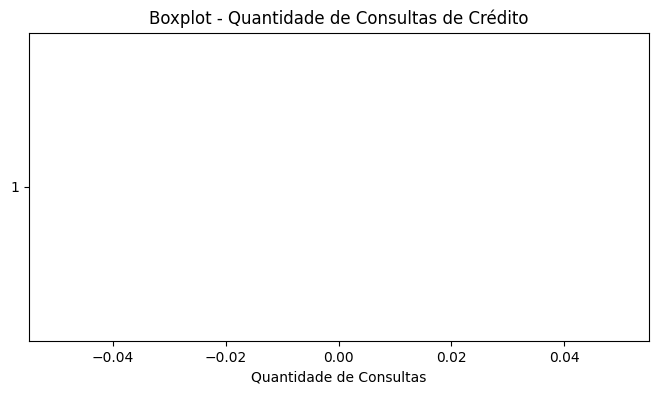

In [89]:
# 1. Verificando valores mínimo e máximo
min_valor = df_processado['qtd_consultas_credito'].min()
max_valor = df_processado['qtd_consultas_credito'].max()

print(f"Valor mínimo: {min_valor}")
print(f"Valor máximo: {max_valor}")

# 2. Criando boxplot para visualizar distribuição
plt.figure(figsize=(8,4))
plt.boxplot(df_processado['qtd_consultas_credito'], vert=False)
plt.title('Boxplot - Quantidade de Consultas de Crédito')
plt.xlabel('Quantidade de Consultas')
plt.show()


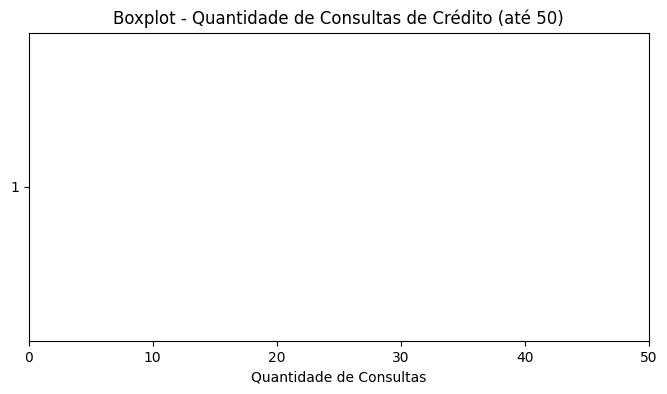

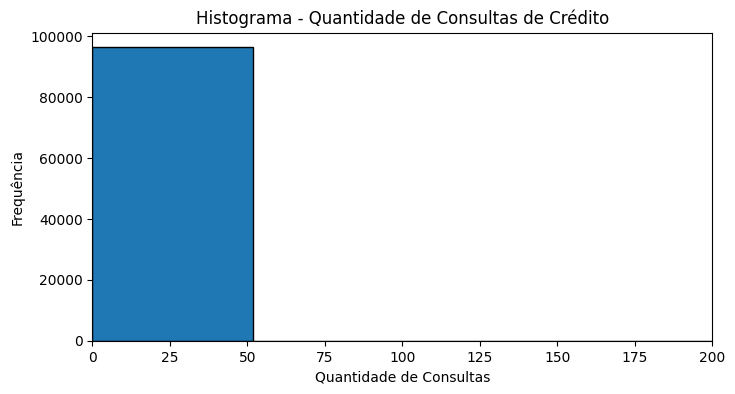

In [90]:
# Novo boxplot limitando o eixo X para ver melhor a distribuição
plt.figure(figsize=(8,4))
plt.boxplot(df_processado['qtd_consultas_credito'], vert=False)
plt.xlim(0, 50)  # limite para não distorcer a visualização
plt.title('Boxplot - Quantidade de Consultas de Crédito (até 50)')
plt.xlabel('Quantidade de Consultas')
plt.show()

# Histograma para entender a distribuição completa
plt.figure(figsize=(8,4))
plt.hist(df_processado['qtd_consultas_credito'], bins=50, edgecolor='black')
plt.title('Histograma - Quantidade de Consultas de Crédito')
plt.xlabel('Quantidade de Consultas')
plt.ylabel('Frequência')
plt.xlim(0, 200)  # zoom para ver melhor a área mais densa
plt.show()


A coluna qtd_consultas_credito tem a maioria dos valores baixos (0–20), mas também aparecem valores absurdamente altos como 1050, 1044, 1936, 1618, etc.

Isso explica porque o boxplot ficou “em branco”: os outliers puxam o gráfico e esmagam os valores normais (0 a 10).

1 Identificar quantos valores são muito altos (ex.: acima de 50 consultas).
2 Verificar a mediana dos valores normais para possível imputação.
3 Decidir se substituímos valores absurdos pela mediana (ou máximo aceitável).



In [92]:
# 1. Contar quantos valores estão acima de 50 (possíveis erros)
valores_acima_50 = df_processado[df_processado['qtd_consultas_credito'] > 50]

print(f"Total de registros acima de 50: {valores_acima_50.shape[0]}")
print("Valores únicos acima de 50:")
print(sorted(valores_acima_50['qtd_consultas_credito'].unique()))

# 2. Calcular estatísticas básicas para os valores 'normais' (até 50)
mediana_normal = df_processado.loc[df_processado['qtd_consultas_credito'] <= 50, 'qtd_consultas_credito'].median()
max_normal = df_processado.loc[df_processado['qtd_consultas_credito'] <= 50, 'qtd_consultas_credito'].max()

print(f"Mediana dos valores até 50: {mediana_normal}")
print(f"Máximo dos valores até 50: {max_normal}")


Total de registros acima de 50: 1634
Valores únicos acima de 50:
[np.float64(52.0), np.float64(53.0), np.float64(54.0), np.float64(57.0), np.float64(59.0), np.float64(60.0), np.float64(61.0), np.float64(63.0), np.float64(64.0), np.float64(66.0), np.float64(67.0), np.float64(70.0), np.float64(71.0), np.float64(74.0), np.float64(76.0), np.float64(78.0), np.float64(83.0), np.float64(86.0), np.float64(87.0), np.float64(89.0), np.float64(93.0), np.float64(101.0), np.float64(103.0), np.float64(107.0), np.float64(112.0), np.float64(113.0), np.float64(114.0), np.float64(115.0), np.float64(116.0), np.float64(118.0), np.float64(119.0), np.float64(122.0), np.float64(125.0), np.float64(129.0), np.float64(131.0), np.float64(133.0), np.float64(134.0), np.float64(135.0), np.float64(137.0), np.float64(145.0), np.float64(150.0), np.float64(151.0), np.float64(152.0), np.float64(153.0), np.float64(154.0), np.float64(158.0), np.float64(159.0), np.float64(160.0), np.float64(163.0), np.float64(164.0), np.fl

Tratando outliers e imputando qtd_consultas_credito
O que será feito
Transformar todos os valores acima de 50 em NaN.

Calcular a mediana considerando apenas os valores até 50.

Imputar todos os NaN com essa mediana.

Verificar o resultado após o tratamento.

In [93]:
# Substituir valores absurdos (acima de 50) por NaN
df_processado.loc[df_processado['qtd_consultas_credito'] > 50, 'qtd_consultas_credito'] = np.nan

# Calcular a mediana apenas com os valores ≤ 50
mediana_qtd_consultas = df_processado.loc[df_processado['qtd_consultas_credito'] <= 50, 'qtd_consultas_credito'].median()
print("Mediana calculada (até 50):", mediana_qtd_consultas)

# Imputar todos os NaN pela mediana
df_processado['qtd_consultas_credito'] = df_processado['qtd_consultas_credito'].fillna(mediana_qtd_consultas)

# Conferir o resultado final
print("Valores nulos após imputação:", df_processado['qtd_consultas_credito'].isna().sum())
print("Valores únicos após tratamento:", sorted(df_processado['qtd_consultas_credito'].unique())[:20])
print("Maior valor após tratamento:", df_processado['qtd_consultas_credito'].max())

Mediana calculada (até 50): 5.0
Valores nulos após imputação: 0
Valores únicos após tratamento: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0), np.float64(11.0), np.float64(12.0), np.float64(13.0), np.float64(14.0), np.float64(15.0), np.float64(16.0), np.float64(17.0), np.float64(26.0), np.float64(29.0)]
Maior valor após tratamento: 49.0


## p